# ProTa/H1 figures 
This notebook calculates the panels for Figure B/C/D as well as most of Fig. S12. 

In [2]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
from matplotlib.ticker import LogLocator
import metapredict as meta
from tqdm.auto import tqdm


In [3]:
from finches import Mpipi_frontend, CALVADOS_frontend
from sparrow import Protein

# initialize with 150 mM NaCl
mf = Mpipi_frontend(salt=0.150)
cf = CALVADOS_frontend(salt=0.150)



/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


In [4]:
# DEFINE THE SEQUENCES
ProtA = 'MSDAAVDTSSEITTKDLKEKKEVVEEAENGRDAPANGNAENEENGEQEADNEVDEEEEEGGEEEEEEEEGDGEEEDGDEDEEAESATGKRAAEDDEDDDVDTKKQKTDEDD'
h1_fl = 'CTENSTSAPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSSRQSIQKYIKSHYKVGENADSQIKLSIKRLVTTGVLKQTKGVGASGSFRLAKSDEPKKSVAFKKTKKEIKKVATPKKASKPKKAASKAPTKKPKATPVKKAKKKLAATPKKAKKPKTVKAKPVKASKPKKAKPVKPKAKSSAKRAGKKKGGPR'

h1_ntd = 'GCENSTSAPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSSRQSIQKYIKSHYKVGENADSQIKLSIKRLVTTGVLKQTKGVGASGSFRLAKSDEPKKSVAFKKTKKEI'
h1_ctd = 'SVAFKKTKKEIKKVATPKKASKPKKAASKAPTKKPKATPVKKAKKKLAATPKKAKKPKTVKAKPVKASKPKKAKPVKPKAKSSAKRAGKKKGGPR'

# also define additional sequences for SI figures...
protamine = 'MPRRRRSSSRPVRRRRRPRVSRRRRRRGGRRRR'
k50 = 'KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK'
r50 = 'RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR'

# all analysis here uses a window size of 13
WINDOW_SIZE=13


## Fig S12C

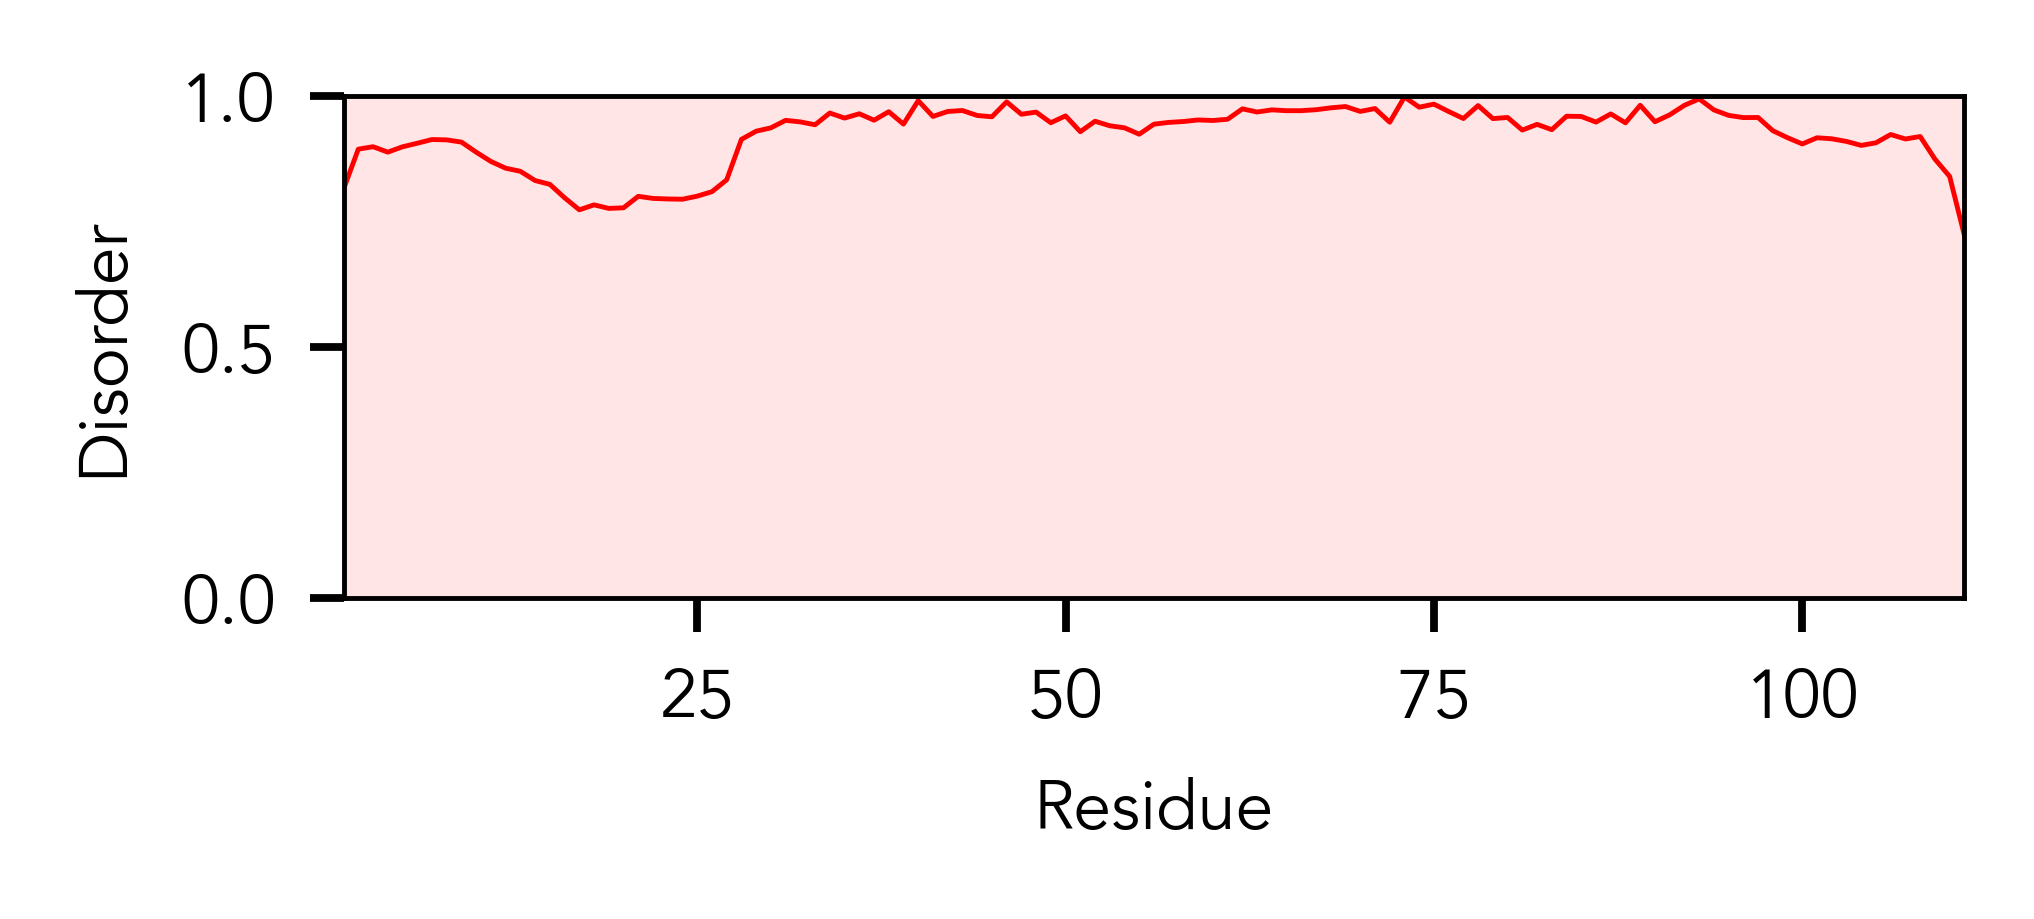

In [5]:
figure(None, (3,1.4), dpi=350)
ax = plt.gca()
seq = ProtA
idx = np.arange(1,len(seq)+1)
plt.plot(idx, meta.predict_disorder(seq, version=2), color='r', lw=0.5)
doms = meta.predict_disorder_domains(seq)
for d in doms.disordered_domain_boundaries:
    ax.axvspan(d[0],d[1],lw=0, color='r', alpha=0.1)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Residue',fontsize=7)
plt.ylabel('Disorder',fontsize=7)
plt.ylim([0,1])
plt.xlim([1,idx[-1]])
plt.tight_layout()
plt.savefig('out_figures/disorder_prot_alpha.pdf')

## Fig S12D

IDR: 1-28
IDR: 85-198


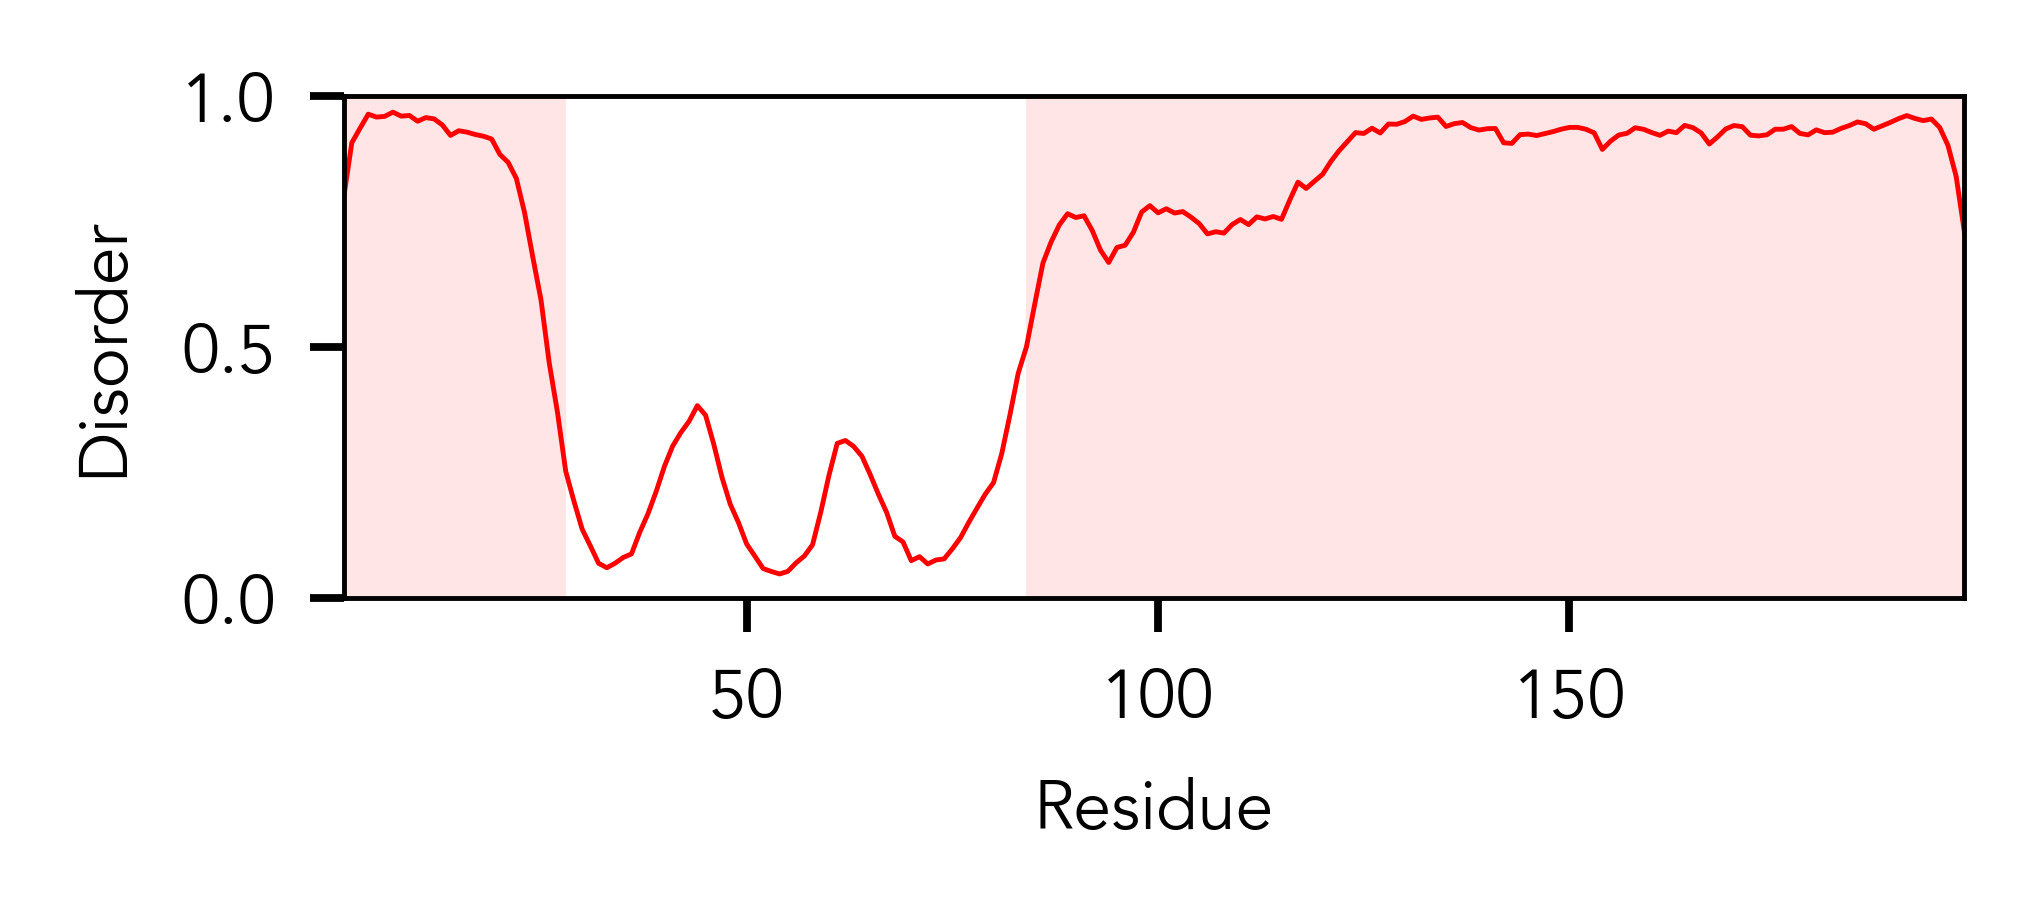

In [6]:
figure(None, (3,1.4), dpi=350)
ax = plt.gca()
seq = h1_fl
idx = np.arange(1,len(seq)+1)
plt.plot(idx, meta.predict_disorder(seq,version=2), color='r', lw=0.5)
doms = meta.predict_disorder_domains(seq)
for d in doms.disordered_domain_boundaries:
    print(f"IDR: {d[0]+1}-{d[1]}")
    ax.axvspan(d[0],d[1],lw=0, color='r', alpha=0.1)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Residue',fontsize=7)
plt.ylabel('Disorder',fontsize=7)
plt.ylim([0,1])
plt.xlim([1,idx[-1]])
plt.tight_layout()
plt.savefig('out_figures/disorder_prot_h1.pdf')

## Fig. 5B
Note we plot these using "plot" instead of "bar" because Illustrator can't handle Jupyter-generated bar-plots on a log scale, so we convert these into "bar" plots post-factor in Illustrator.

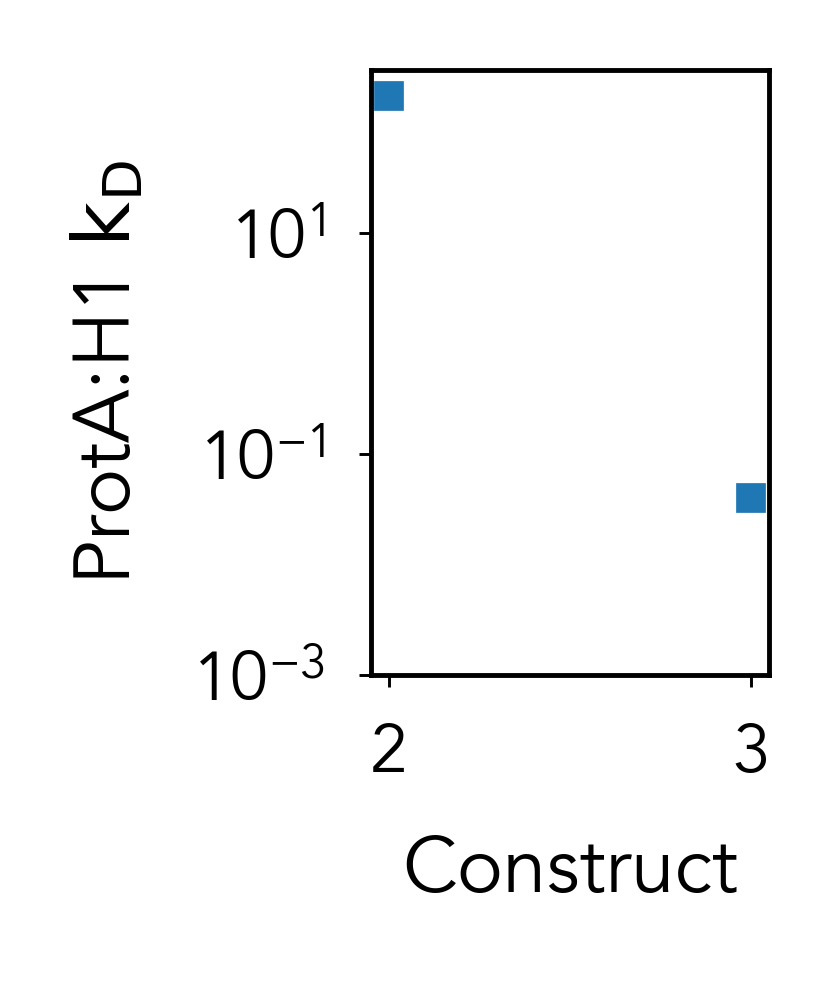

In [20]:
figure(None, (1.3,1.5), dpi=350)
ax = plt.gca()

# experimental data from Borgia et al. 2018
plt.plot([2,3], [173, 0.04], 's', ms=2)

plt.yscale('log')
ax.axhline(0,color='k', lw=0.4)
plt.xlabel('Construct', fontsize=8)
plt.ylim([0.001,300])


#ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 1, numticks=10))

ax.tick_params(axis='both',          # changes apply to both x and y-axis
               which='major',        # major ticks are affected
               length=1.2,            # length of the ticks
               width=0.3,              # width of the ticks
               color='k')          # color of the ticks


#plt.xlabel('Histone H1 residue', fontsize=8)
plt.ylabel(r'ProtA:H1 $ \rm k_D $', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('out_figures/h1_protA_fl_n_c_fa.pdf')


## Fig S12A and S12H
Intermaps for h1_fl vs. ProtA using both standard and null normalization.

(<Figure size 2975x2975 with 4 Axes>,
 <Axes: >,
 <Axes: >,
 <Axes: >,
 <Axes: >)

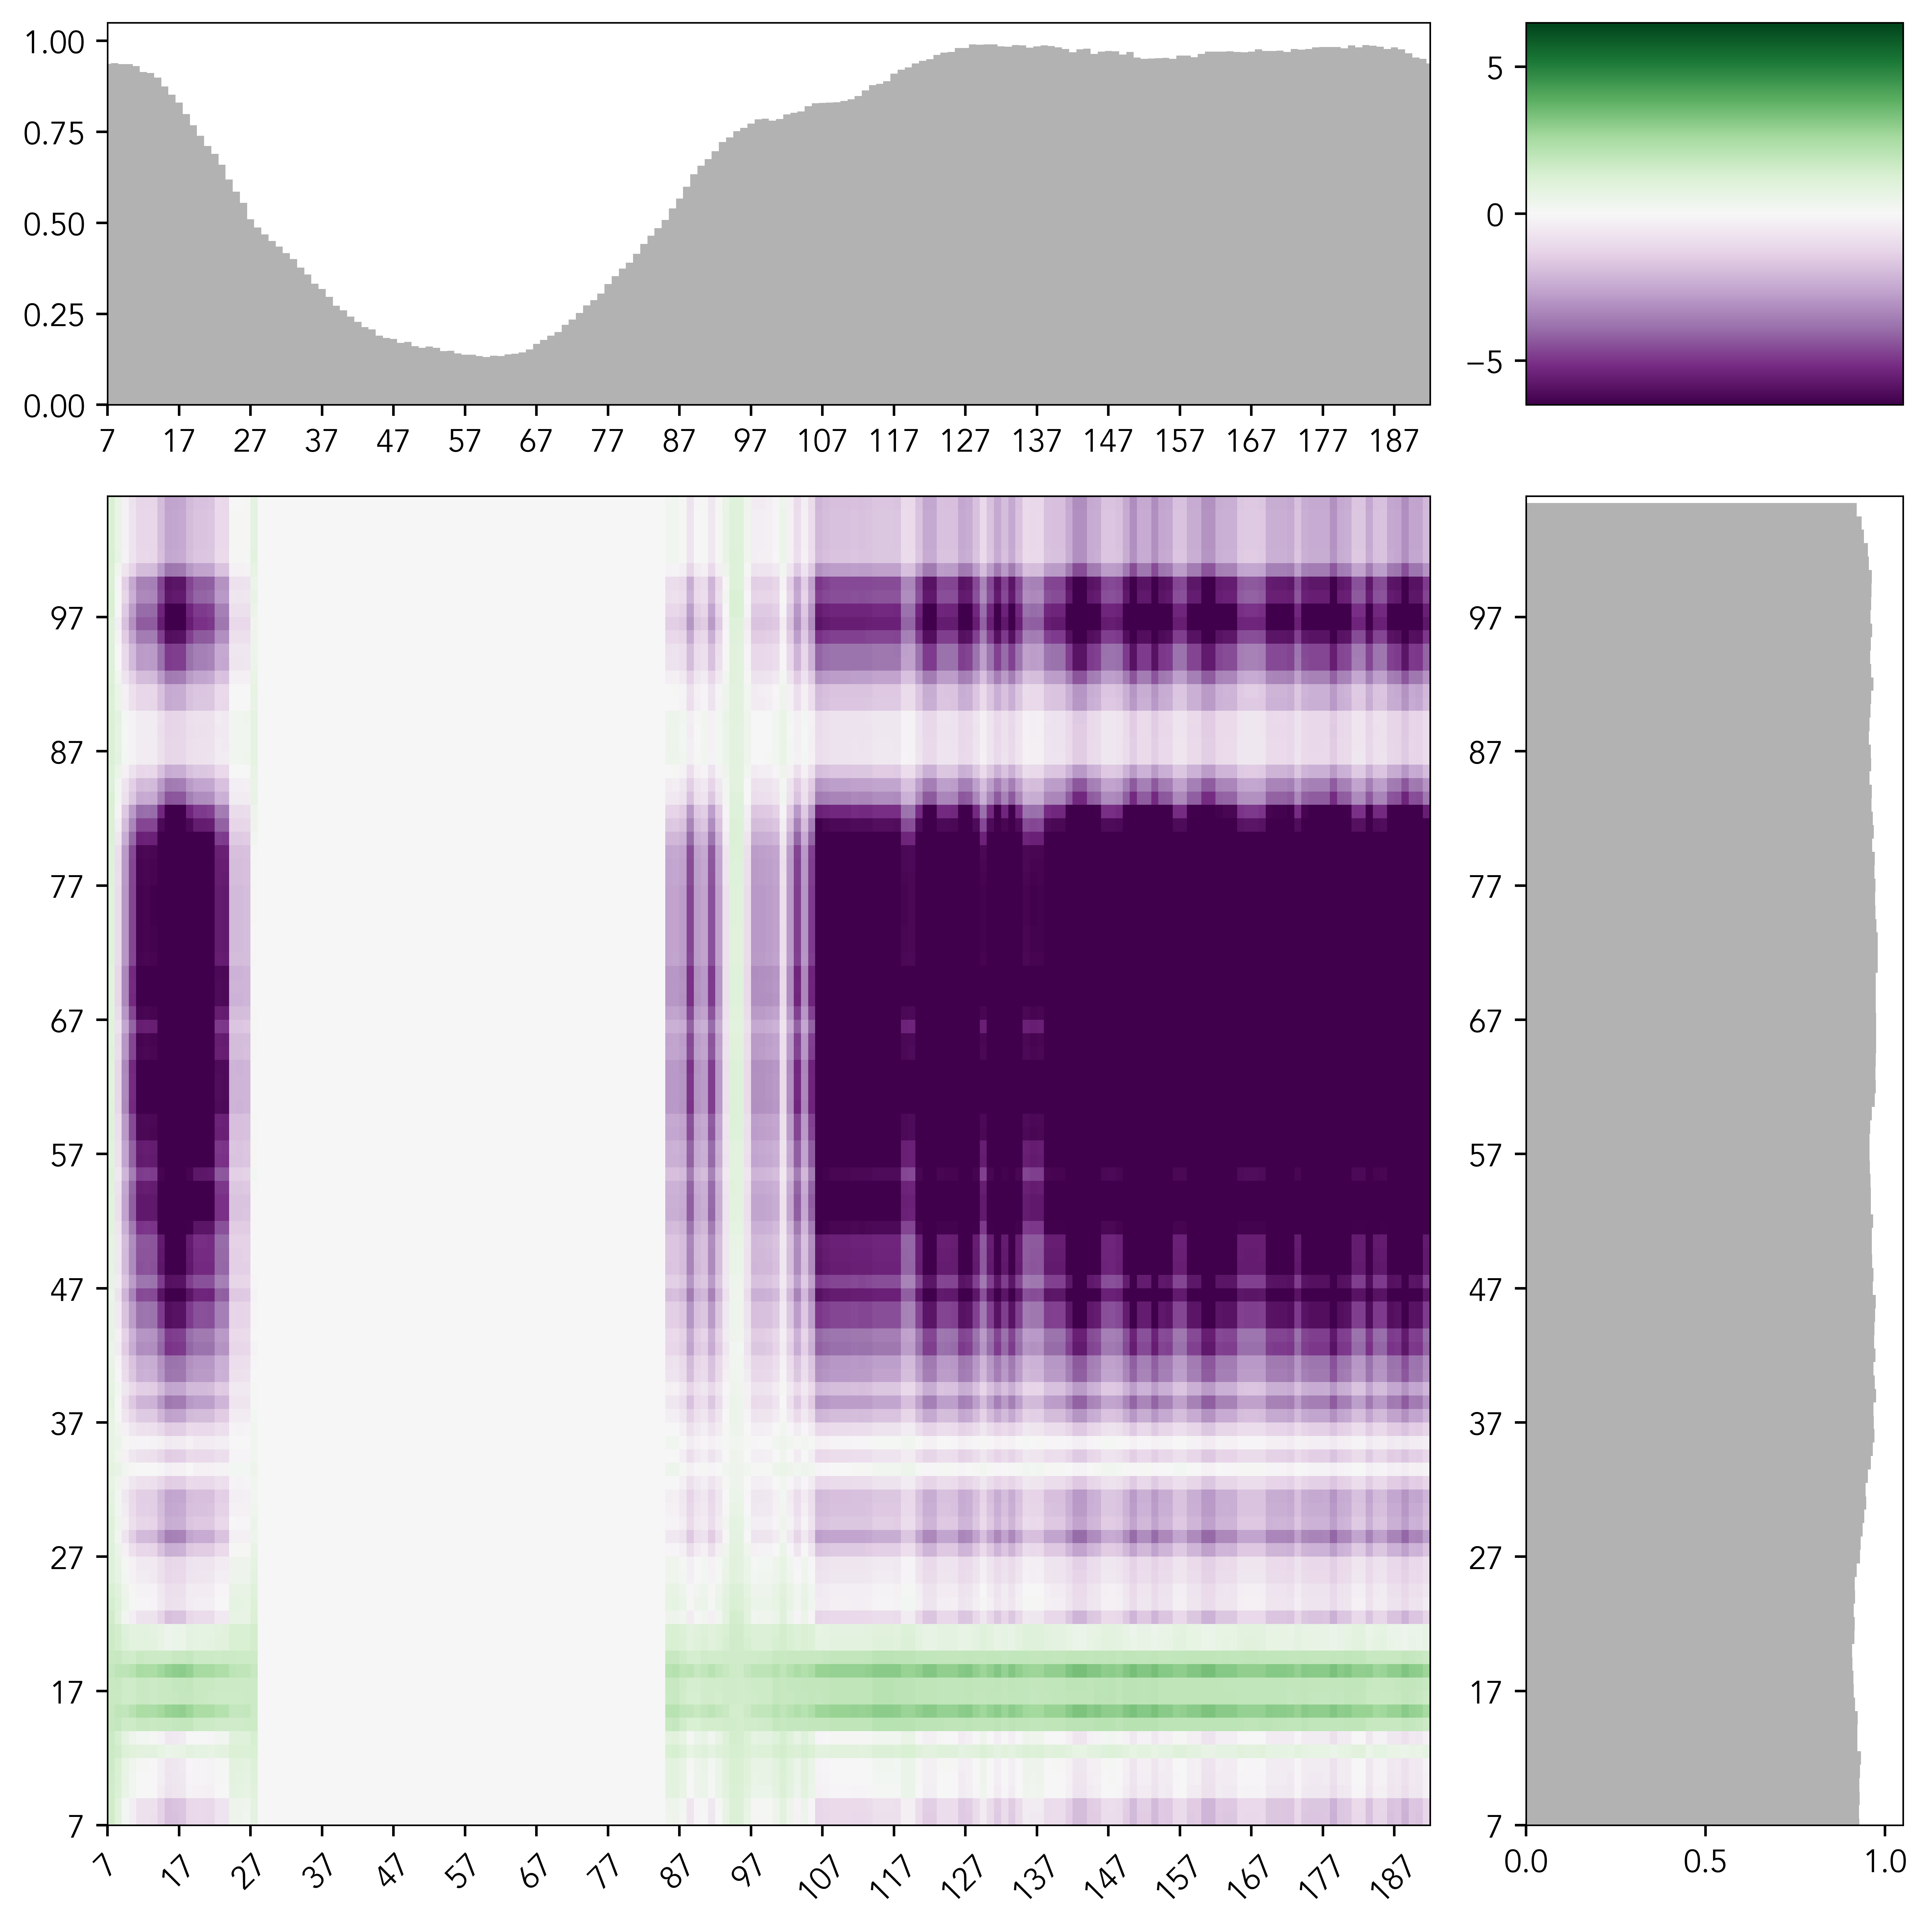

In [11]:
mf.interaction_figure(h1_fl, ProtA, window_size=WINDOW_SIZE, vmin=-6.5, vmax=6.5, tic_frequency=10, fname='out_figures/h1_prot_intermap.pdf')
mf.interaction_figure(h1_fl, ProtA, window_size=WINDOW_SIZE, vmin=-6.5, vmax=6.5, tic_frequency=10, null_shuffle=1000,fname='out_figures/h1_prot_intermap_null_normalized.pdf')


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.65it/s]


(<Figure size 2975x2975 with 4 Axes>,
 <Axes: >,
 <Axes: >,
 <Axes: >,
 <Axes: >)

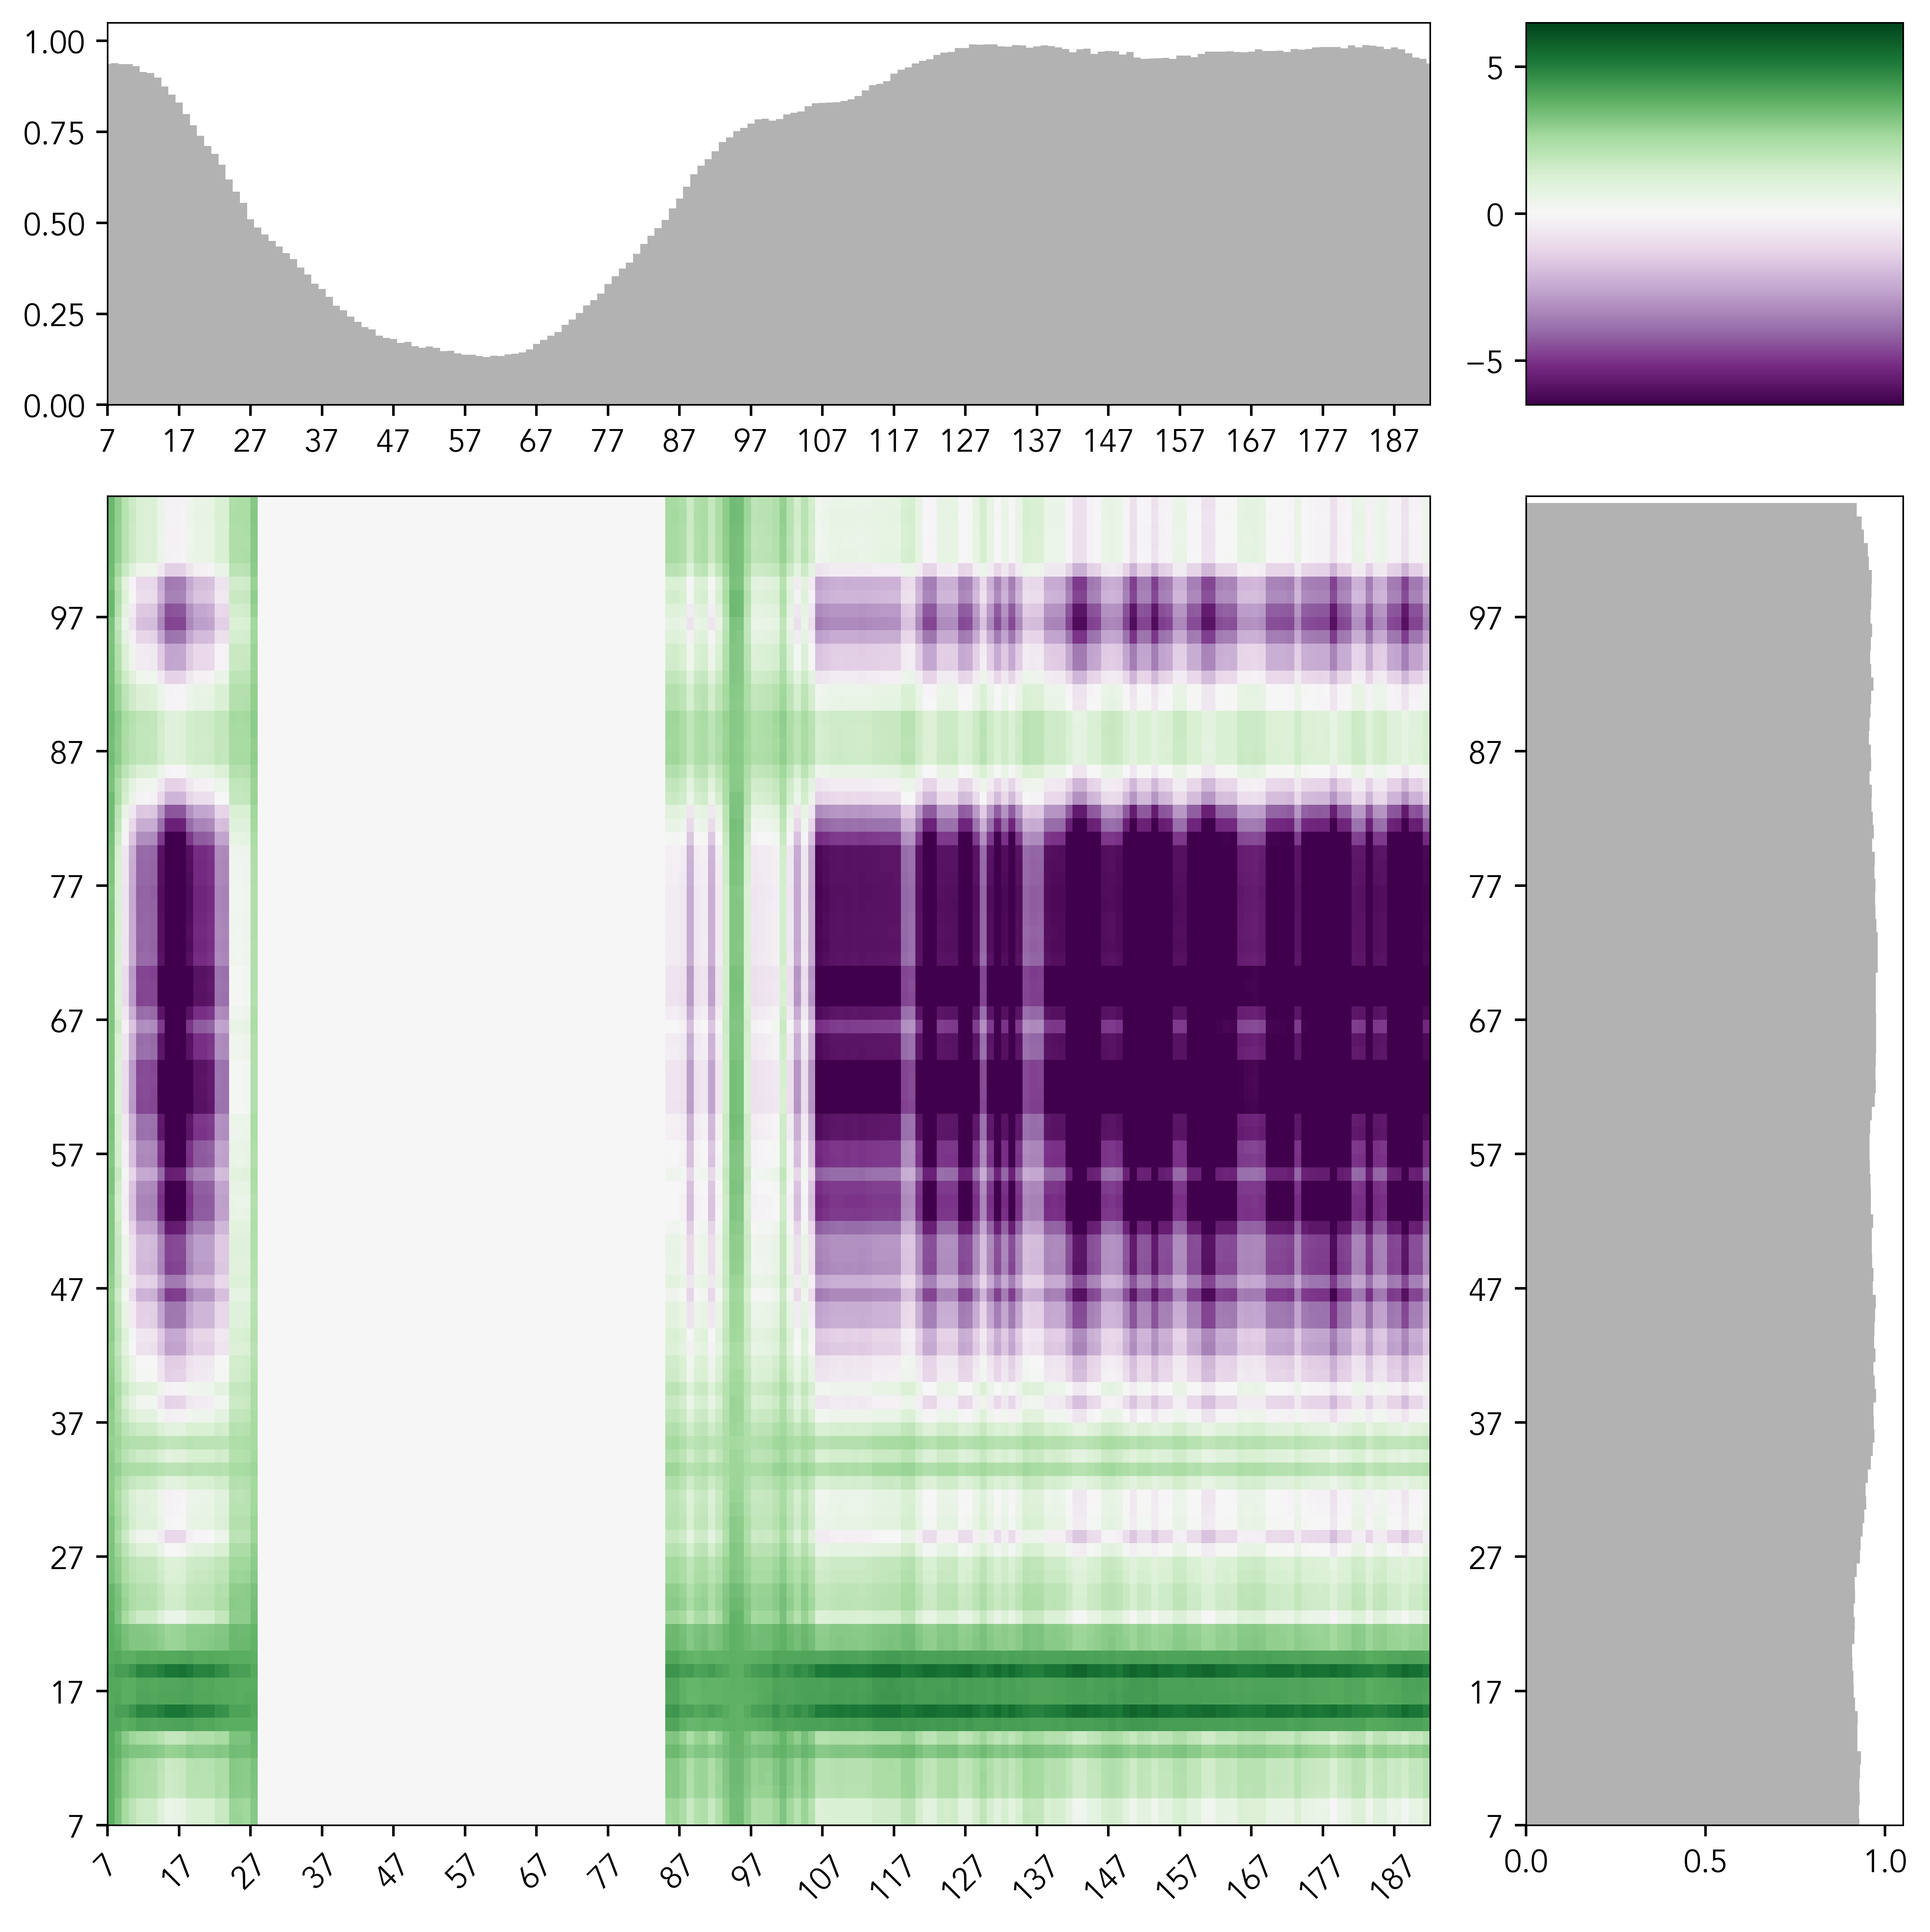

## Fig. 5C

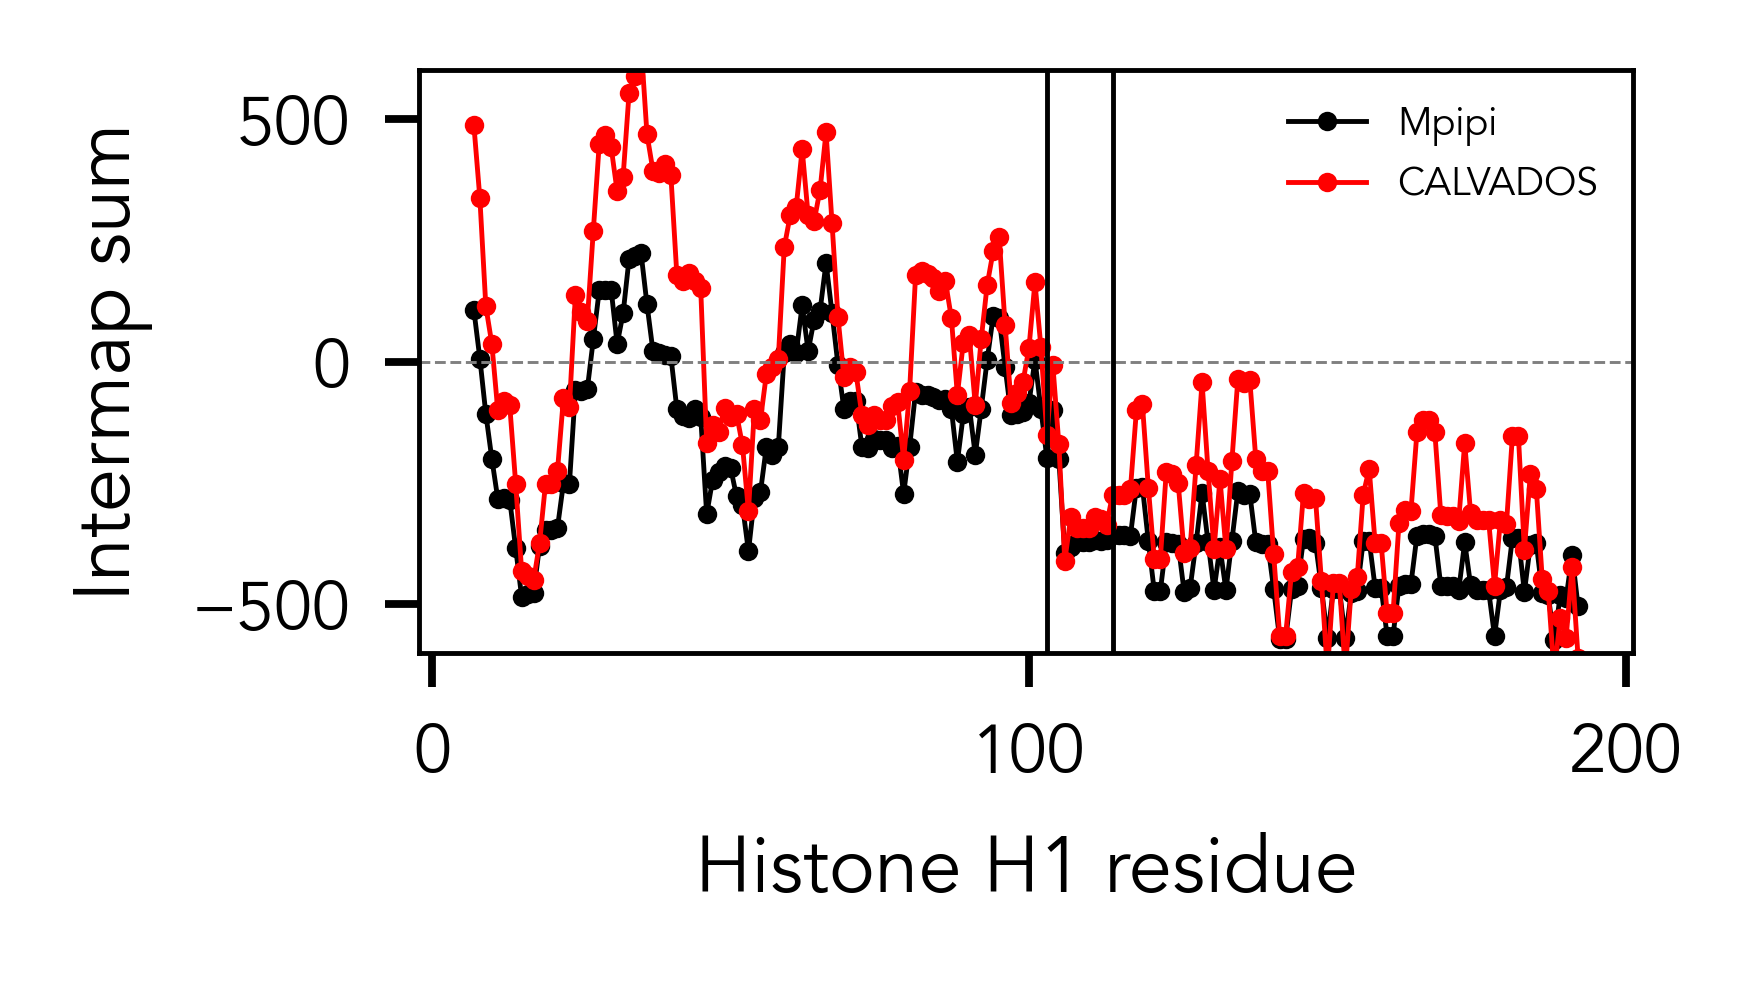

In [9]:
figure(None, (2.6,1.5), dpi=350)
ax = plt.gca()


A_mf = mf.intermolecular_idr_matrix(ProtA,h1_fl, window_size=WINDOW_SIZE)
A_cf = cf.intermolecular_idr_matrix(ProtA,h1_fl, window_size=WINDOW_SIZE)


offset = 0
plt.plot(A_mf[0][2]+offset, 1*np.sum(A_mf[0][0],0),'.k-',  ms=4, mew=0, lw=0.5, label='Mpipi')
plt.plot(A_cf[0][2]+offset, 1*np.sum(A_cf[0][0],0),'.r-', ms=4, mew=0, lw=0.5, label='CALVADOS')
ax = plt.gca()
ax.axhline(0,color='grey', ls='--',lw=0.3)
plt.legend(fontsize=4,frameon=False)

ax.axvline(103,color='k', lw=0.5)
ax.axvline(114,color='k', lw=0.5)

plt.ylim([-600,600])    

plt.xlabel('Histone H1 residue', fontsize=8)
plt.ylabel('Intermap sum', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('out_figures/h1_protA_linear.pdf')


## Fig. S12G
The code below computes the linear per-residue profile AFTER subtracting off the null shuffle model

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.87it/s]


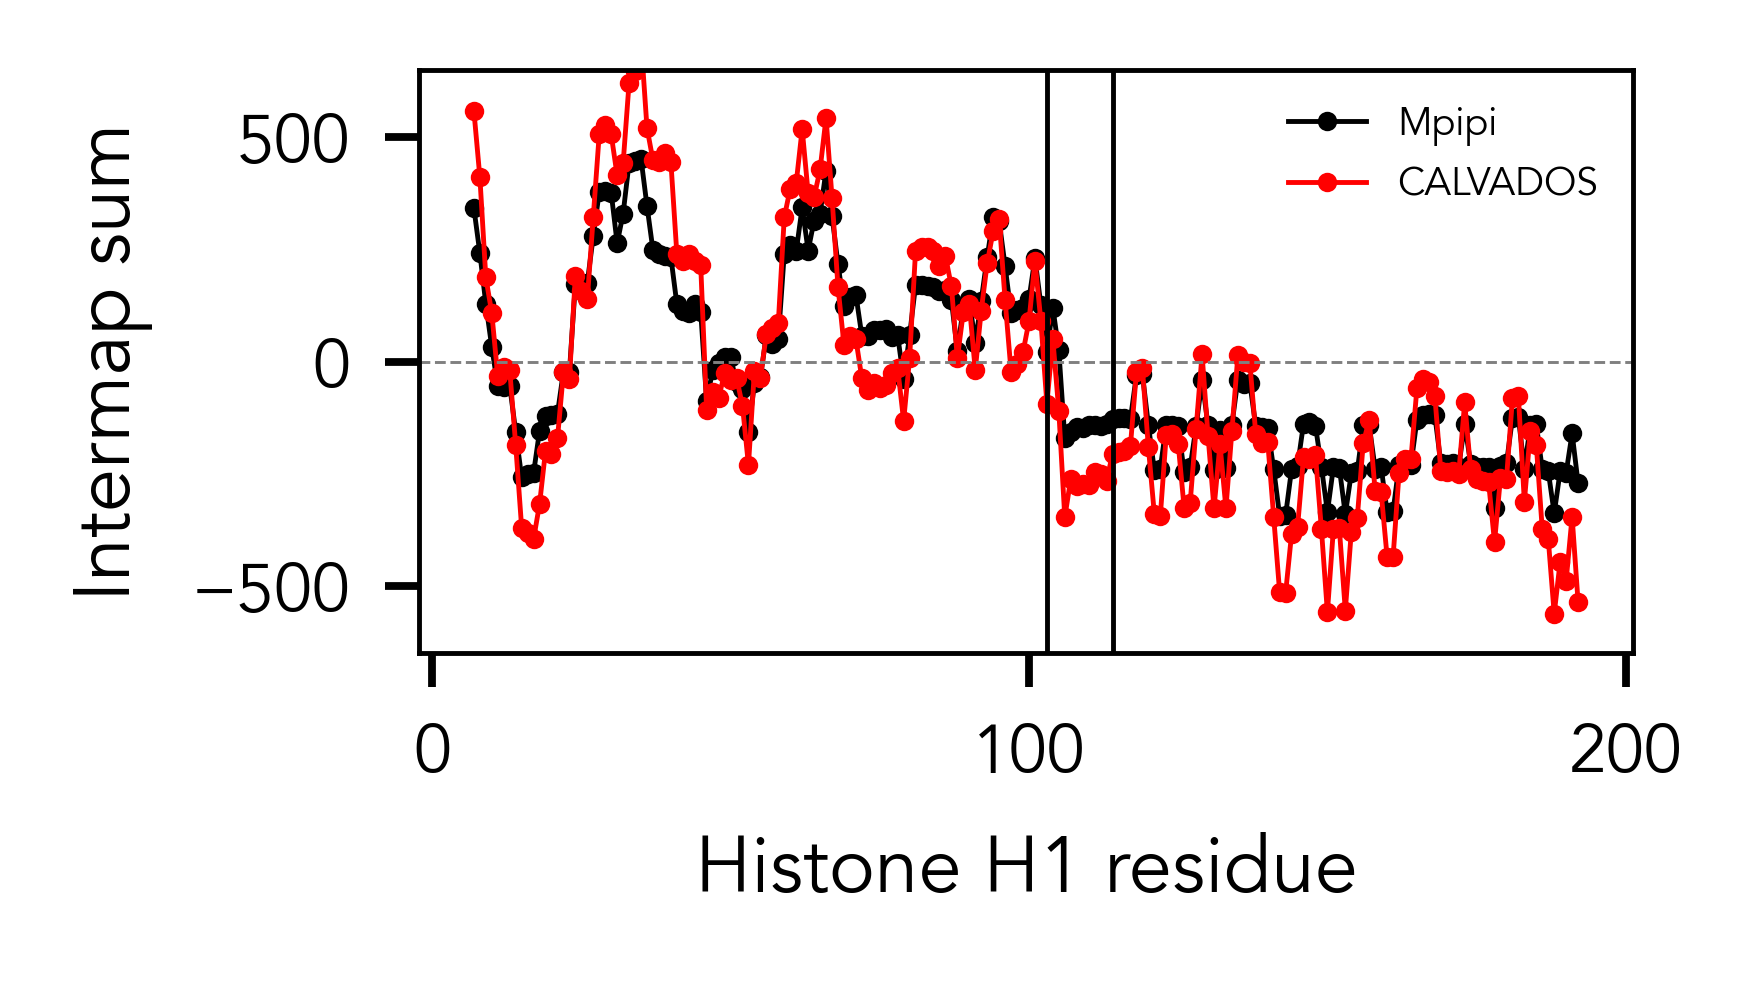

In [16]:
figure(None, (2.6,1.5), dpi=350)
ax = plt.gca()


A_mf = mf.intermolecular_idr_matrix(ProtA,h1_fl, window_size=WINDOW_SIZE, null_shuffle=1000)
A_cf = cf.intermolecular_idr_matrix(ProtA,h1_fl, window_size=WINDOW_SIZE, null_shuffle=1000)


offset = 0
plt.plot(A_mf[0][2]+offset, 1*np.sum(A_mf[0][0],0),'.k-',  ms=4, mew=0, lw=0.5, label='Mpipi')
plt.plot(A_cf[0][2]+offset, 1*np.sum(A_cf[0][0],0),'.r-', ms=4, mew=0, lw=0.5, label='CALVADOS')
ax = plt.gca()
ax.axhline(0,color='grey', ls='--',lw=0.3)
plt.legend(fontsize=4,frameon=False)

ax.axvline(103,color='k', lw=0.5)
ax.axvline(114,color='k', lw=0.5)

plt.ylim([-650,650])    

plt.xlabel('Histone H1 residue', fontsize=8)
plt.ylabel('Intermap sum', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('out_figures/h1_protA_linear_null_normalized.pdf')


# ProtA linear profile vs H1 with ProtA summed along the ProtA axis
This is not actually in the paper but we just include it here for completeness, because we do do this for the proamine vs. H1 comparison.

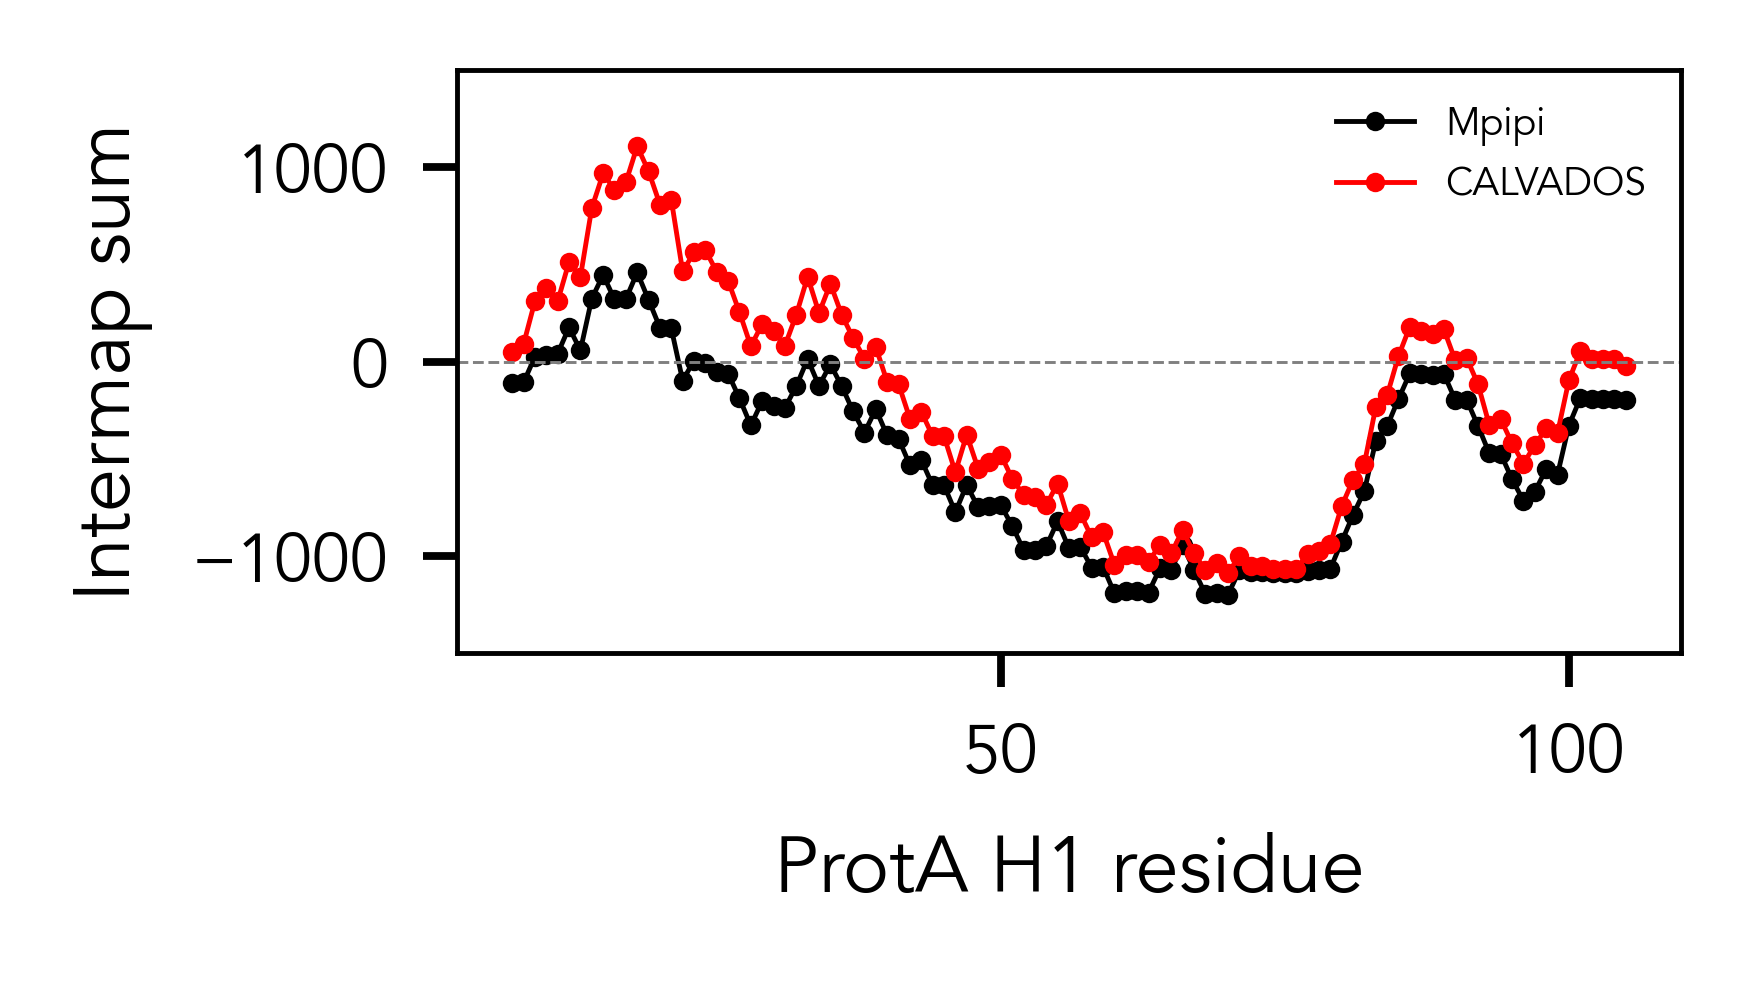

In [17]:
figure(None, (2.6,1.5), dpi=350)
ax = plt.gca()


A_mf = mf.intermolecular_idr_matrix(ProtA,h1_fl, window_size=WINDOW_SIZE)
A_cf = cf.intermolecular_idr_matrix(ProtA,h1_fl, window_size=WINDOW_SIZE)


offset = 0
plt.plot(A_mf[0][1]+offset, 1*np.sum(A_mf[0][0],1),'.k-',  ms=4, mew=0, lw=0.5, label='Mpipi')
plt.plot(A_cf[0][1]+offset, 1*np.sum(A_cf[0][0],1),'.r-', ms=4, mew=0, lw=0.5, label='CALVADOS')
ax = plt.gca()
ax.axhline(0,color='grey', ls='--',lw=0.3)
plt.legend(fontsize=4,frameon=False)

#ax.axvline(103,color='k', lw=0.5)
#ax.axvline(114,color='k', lw=0.5)

plt.ylim([-1500, 1500])    

plt.xlabel('ProtA H1 residue', fontsize=8)
plt.ylabel('Intermap sum', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('out_figures/protA_linear_vs_H1.pdf')


# Figure S12E
This figure was generated to compare against exciting new work from Galvanetto & Ivanović et al (arXiv) 2024 [1]. For convenience, we reproduce here the comparison we're aiming to make. The top panel is taken from Fig. 3E in Galvanetto & Ivanović et al and reports on the average number of contacts per ProTa residue in the context of interacting with either histone H1.0 (blue) or protamine (purple). Higher values mean more contacts. The bottom panel is our FINCHES prediction, where lower values mean more predicted interaction. As is clear, the two profiles are qualitative mirror images of one another, suggesting good agreement between simulation (top) and prediction (bottom).

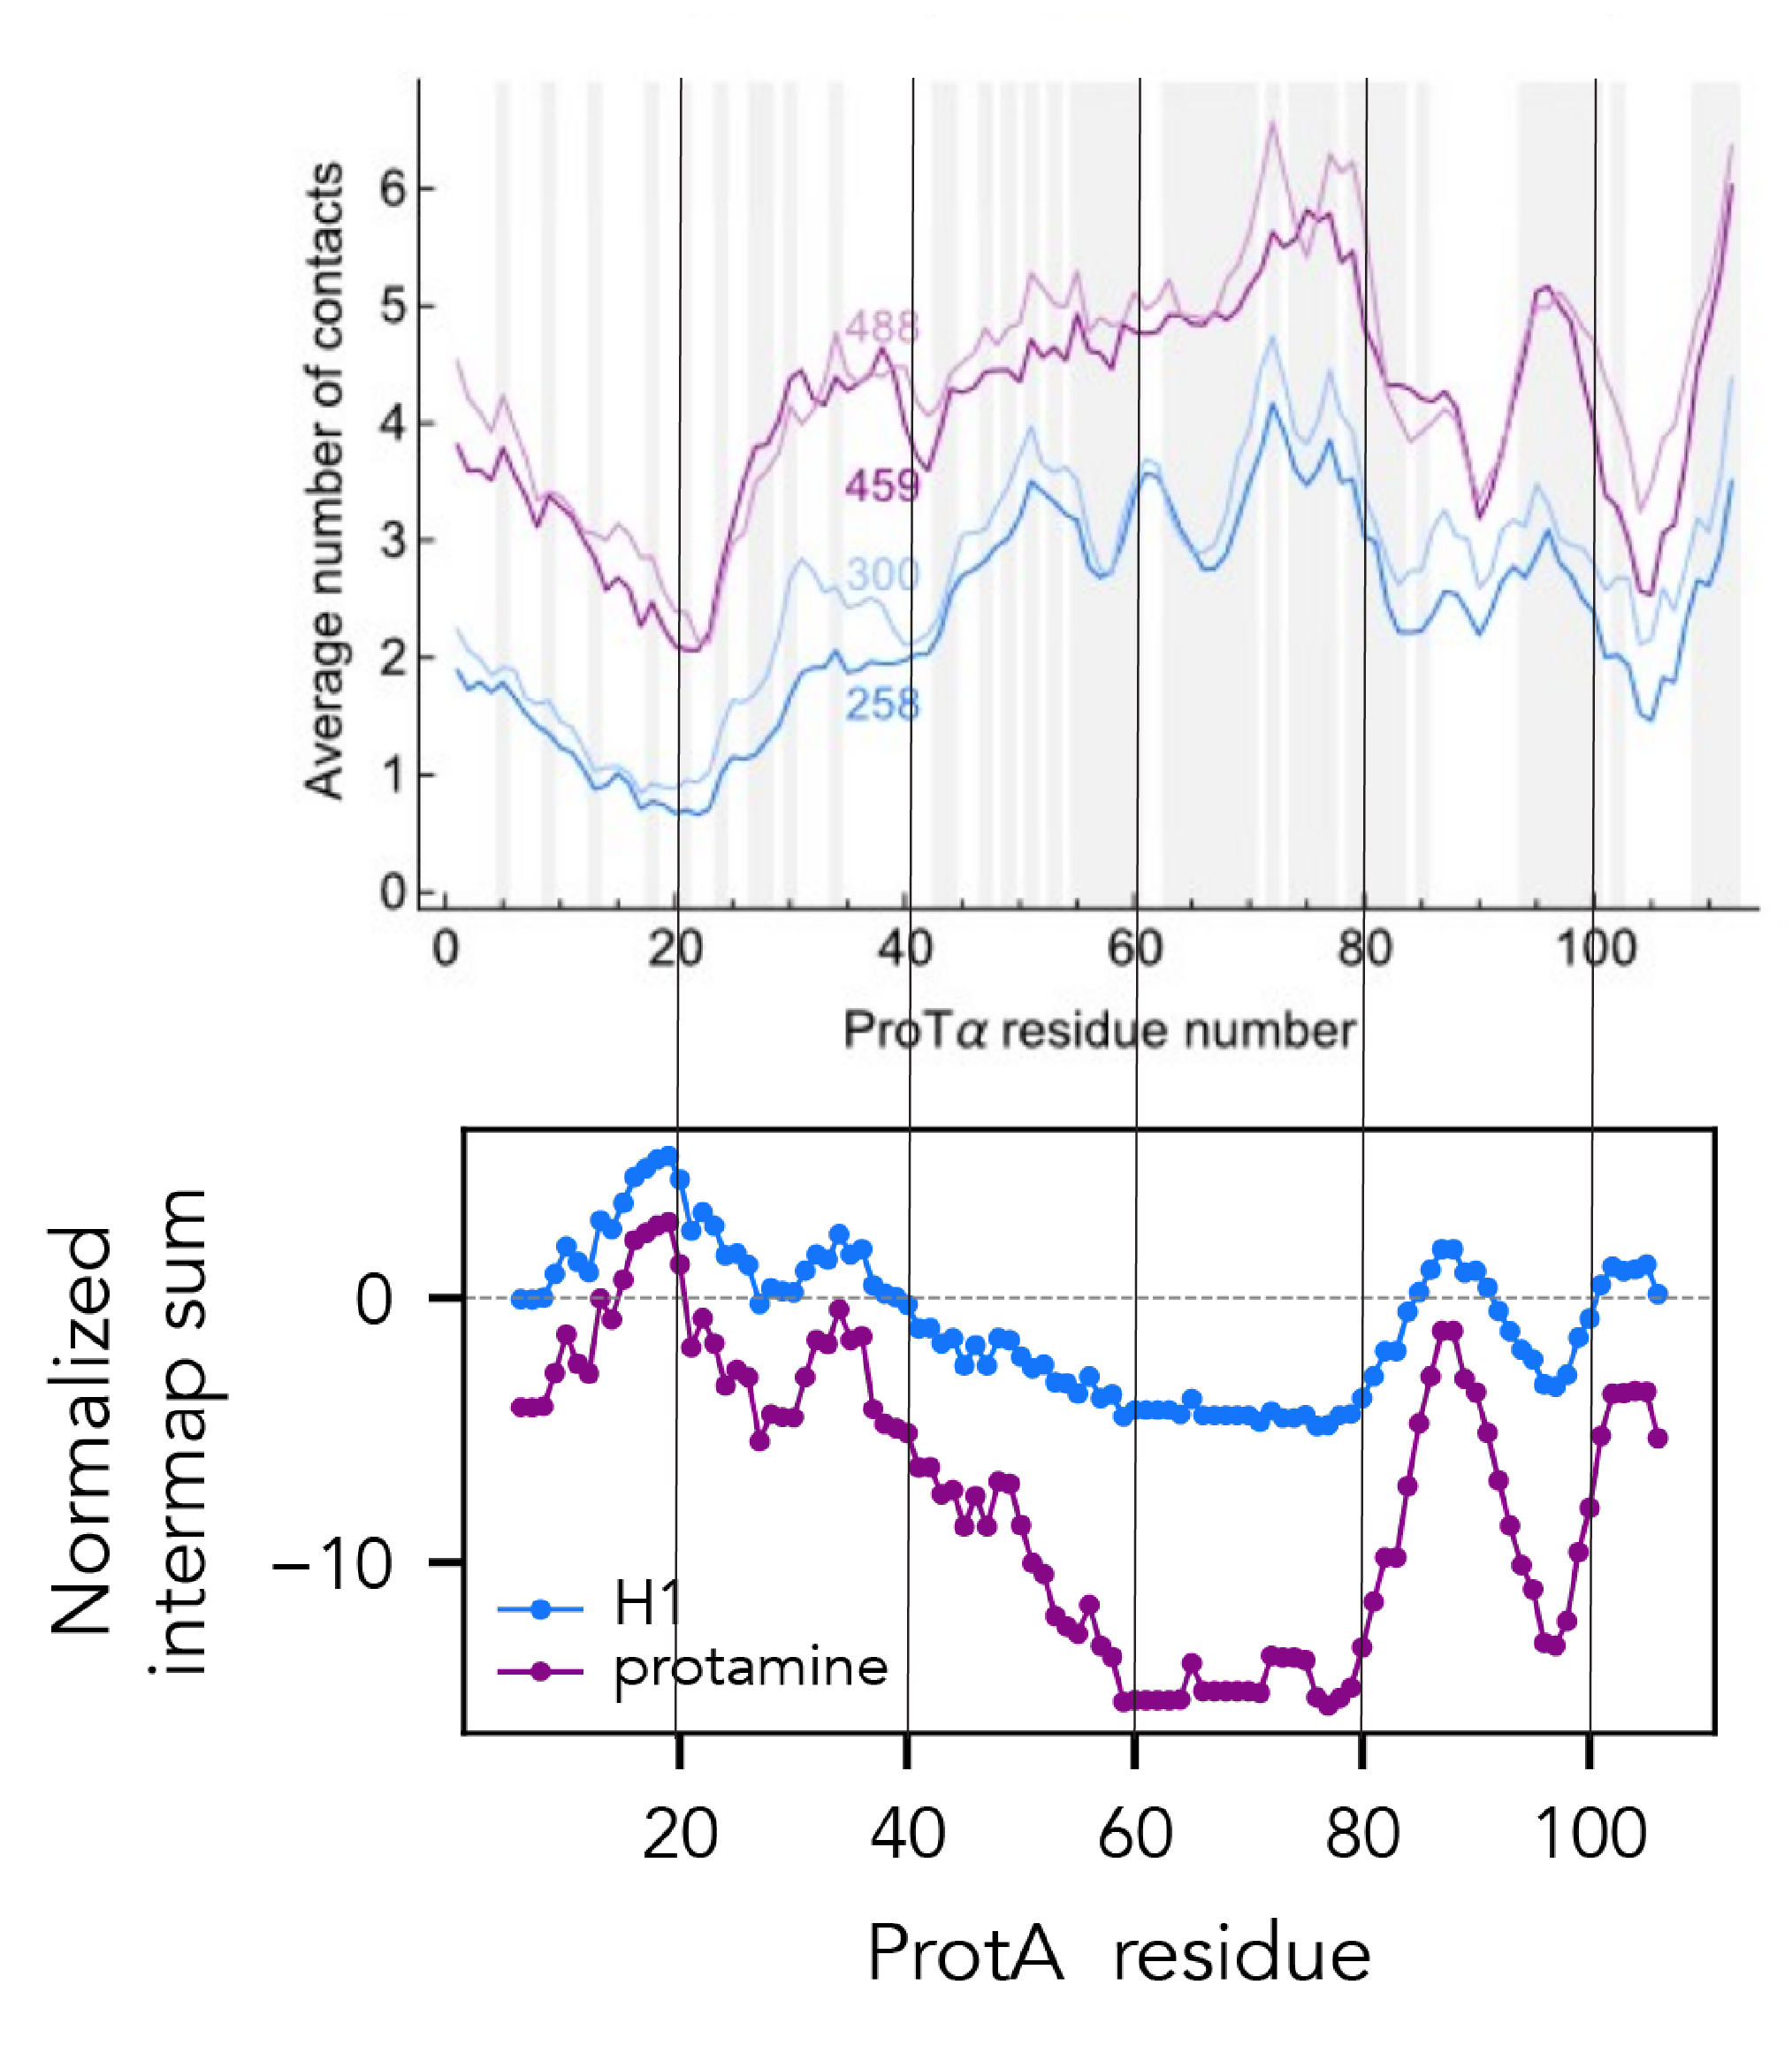



#### References
Galvanetto, N., Ivanović, M. T., Del Grosso, S. A., Chowdhury, A., Sottini, A., Nettels, D., Best, R. B. & Schuler, B. Mesoscale properties of biomolecular condensates emerging from protein chain dynamics. arXiv [physics.bio-ph] (2024). at &#60;http://arxiv.org/abs/2407.19202&#62;
  





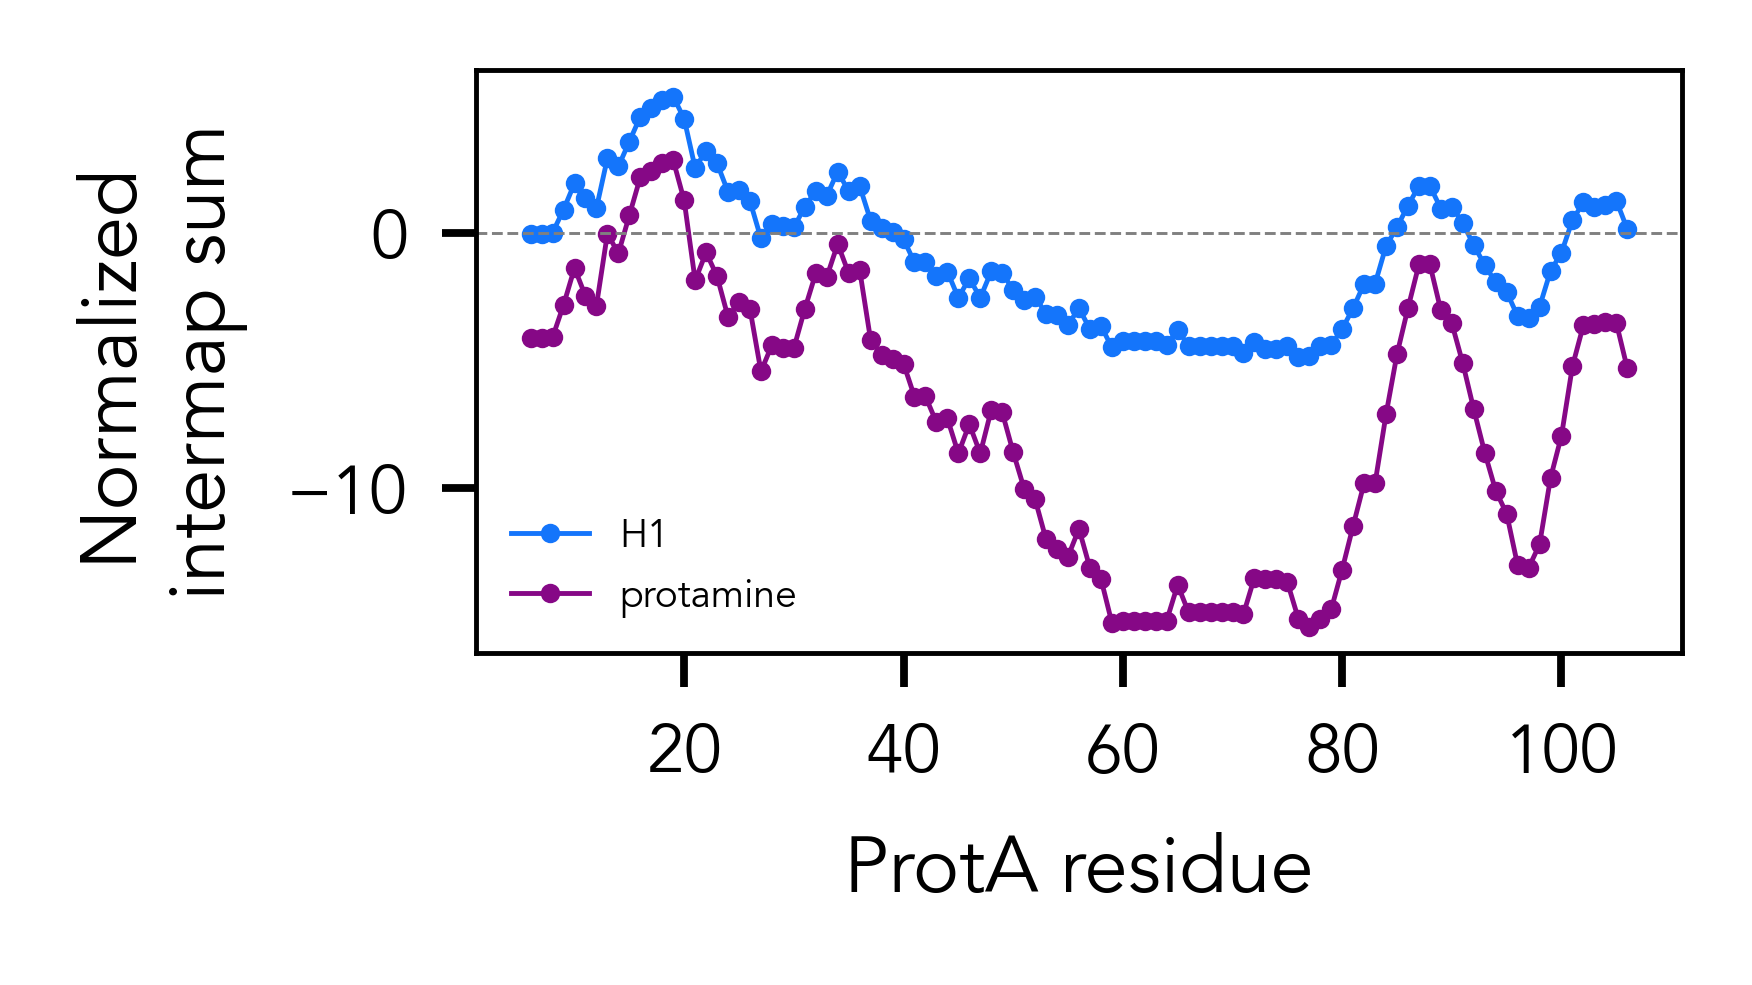

In [18]:
figure(None, (2.6,1.5), dpi=350)
ax = plt.gca()


h1_cf_150 = cf.intermolecular_idr_matrix(ProtA, h1_fl, window_size=11)
protamine_cf_150 = cf.intermolecular_idr_matrix(ProtA, protamine, window_size=11)


offset = 0

# note we normalize interaction here by dividing by length of chain
plt.plot(h1_cf_150[0][1]+offset, 1*np.sum(h1_cf_150[0][0],1)/len(h1_fl),'.-',  ms=4, mew=0, lw=0.5, label='H1', color='#1475FB', alpha=1)
plt.plot(protamine_cf_150[0][1]+offset, 1*np.sum(protamine_cf_150[0][0],1)/len(protamine),'.-',  ms=4, mew=0, lw=0.5, label='protamine', color='#860886', alpha=1)



ax = plt.gca()
ax.axhline(0,color='grey', ls='--',lw=0.3)
plt.legend(fontsize=4,frameon=False)
plt.xticks(np.arange(protamine_cf_150[0][1][0]+14, 120, 20))

#ax.axvline(103,color='k', lw=0.5)
#ax.axvline(114,color='k', lw=0.5)

#plt.ylim([-1500, 1500])    

plt.xlabel('ProtA residue', fontsize=8)
plt.ylabel('Normalized\nintermap sum', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('out_figures/protA_linear_vs_H1_vs_protamine.pdf')


# Fig 5D

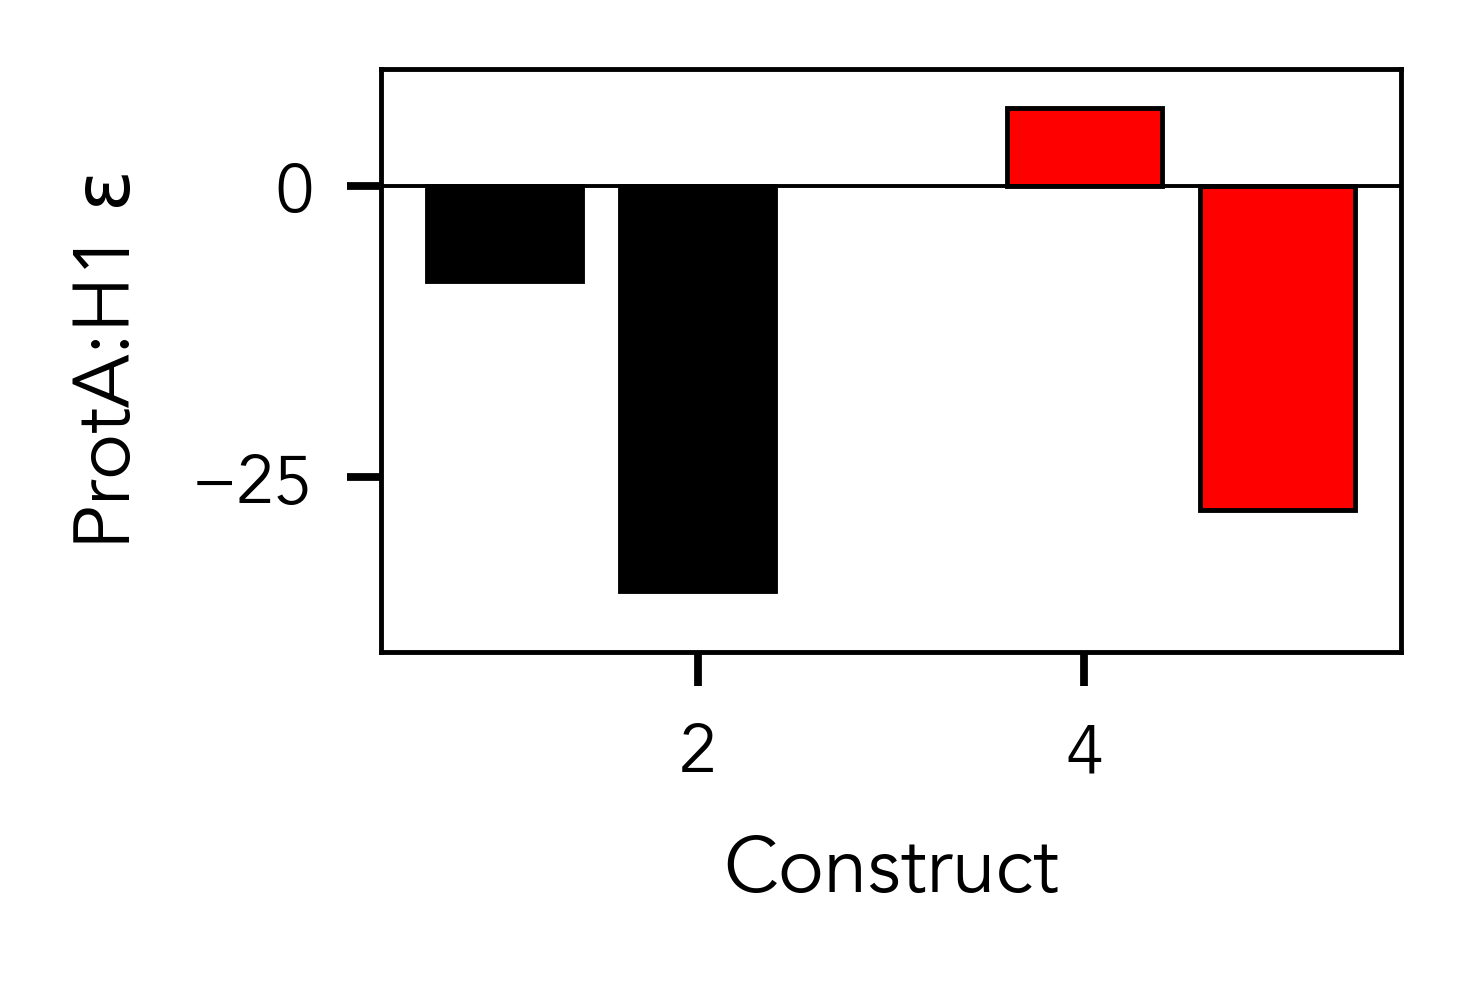

In [19]:
eps_ntd_mf = mf.epsilon(ProtA, h1_ntd)
eps_ctd_mf = mf.epsilon(ProtA, h1_ctd)
eps_fl_mf = mf.epsilon(ProtA, h1_fl)


eps_ntd_cf = cf.epsilon(ProtA, h1_ntd)
eps_ctd_cf = cf.epsilon(ProtA, h1_ctd)
eps_fl_cf = cf.epsilon(ProtA, h1_fl)


figure(None, (2.2,1.5), dpi=350)
ax = plt.gca()

#plt.bar([1,2,3], [eps_fl_mf, eps_ntd_mf, eps_ctd_mf, ], color='k', edgecolor='k', linewidth=0.5)
#plt.bar([5,6,7], [eps_fl_cf, eps_ntd_cf, eps_ctd_cf, ], color='r', edgecolor='k', linewidth=0.5)

plt.bar([1,2], [eps_ntd_mf, eps_ctd_mf, ], color='k', edgecolor='k', linewidth=0.5)
plt.bar([4,5], [eps_ntd_cf, eps_ctd_cf, ], color='r', edgecolor='k', linewidth=0.5)
ax.axhline(0,color='k', lw=0.4)
plt.xlabel('Construct', fontsize=8)


plt.ylim([-40, 10])

#plt.xlabel('Histone H1 residue', fontsize=8)
plt.ylabel(r'ProtA:H1 $ \rm\epsilon $', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()

plt.savefig('out_figures/h1_protA_n_c.pdf')


In [24]:
# define slat titration range
start = np.log10(0.01)
end = np.log10(0.5)
salt = np.logspace(start, end, num=20)

cf_eps_salt = []
mf_eps_salt = []
for s in tqdm(salt):
    cf = CALVADOS_frontend(salt=s)
    cf_eps_salt.append(cf.epsilon(ProtA, h1_fl))

    mf = Mpipi_frontend(salt=s)
    mf_eps_salt.append(mf.epsilon(ProtA, h1_fl))

  0%|          | 0/20 [00:00<?, ?it/s]

/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )
/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )
/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882

## Fig S12B

0.485
0.2


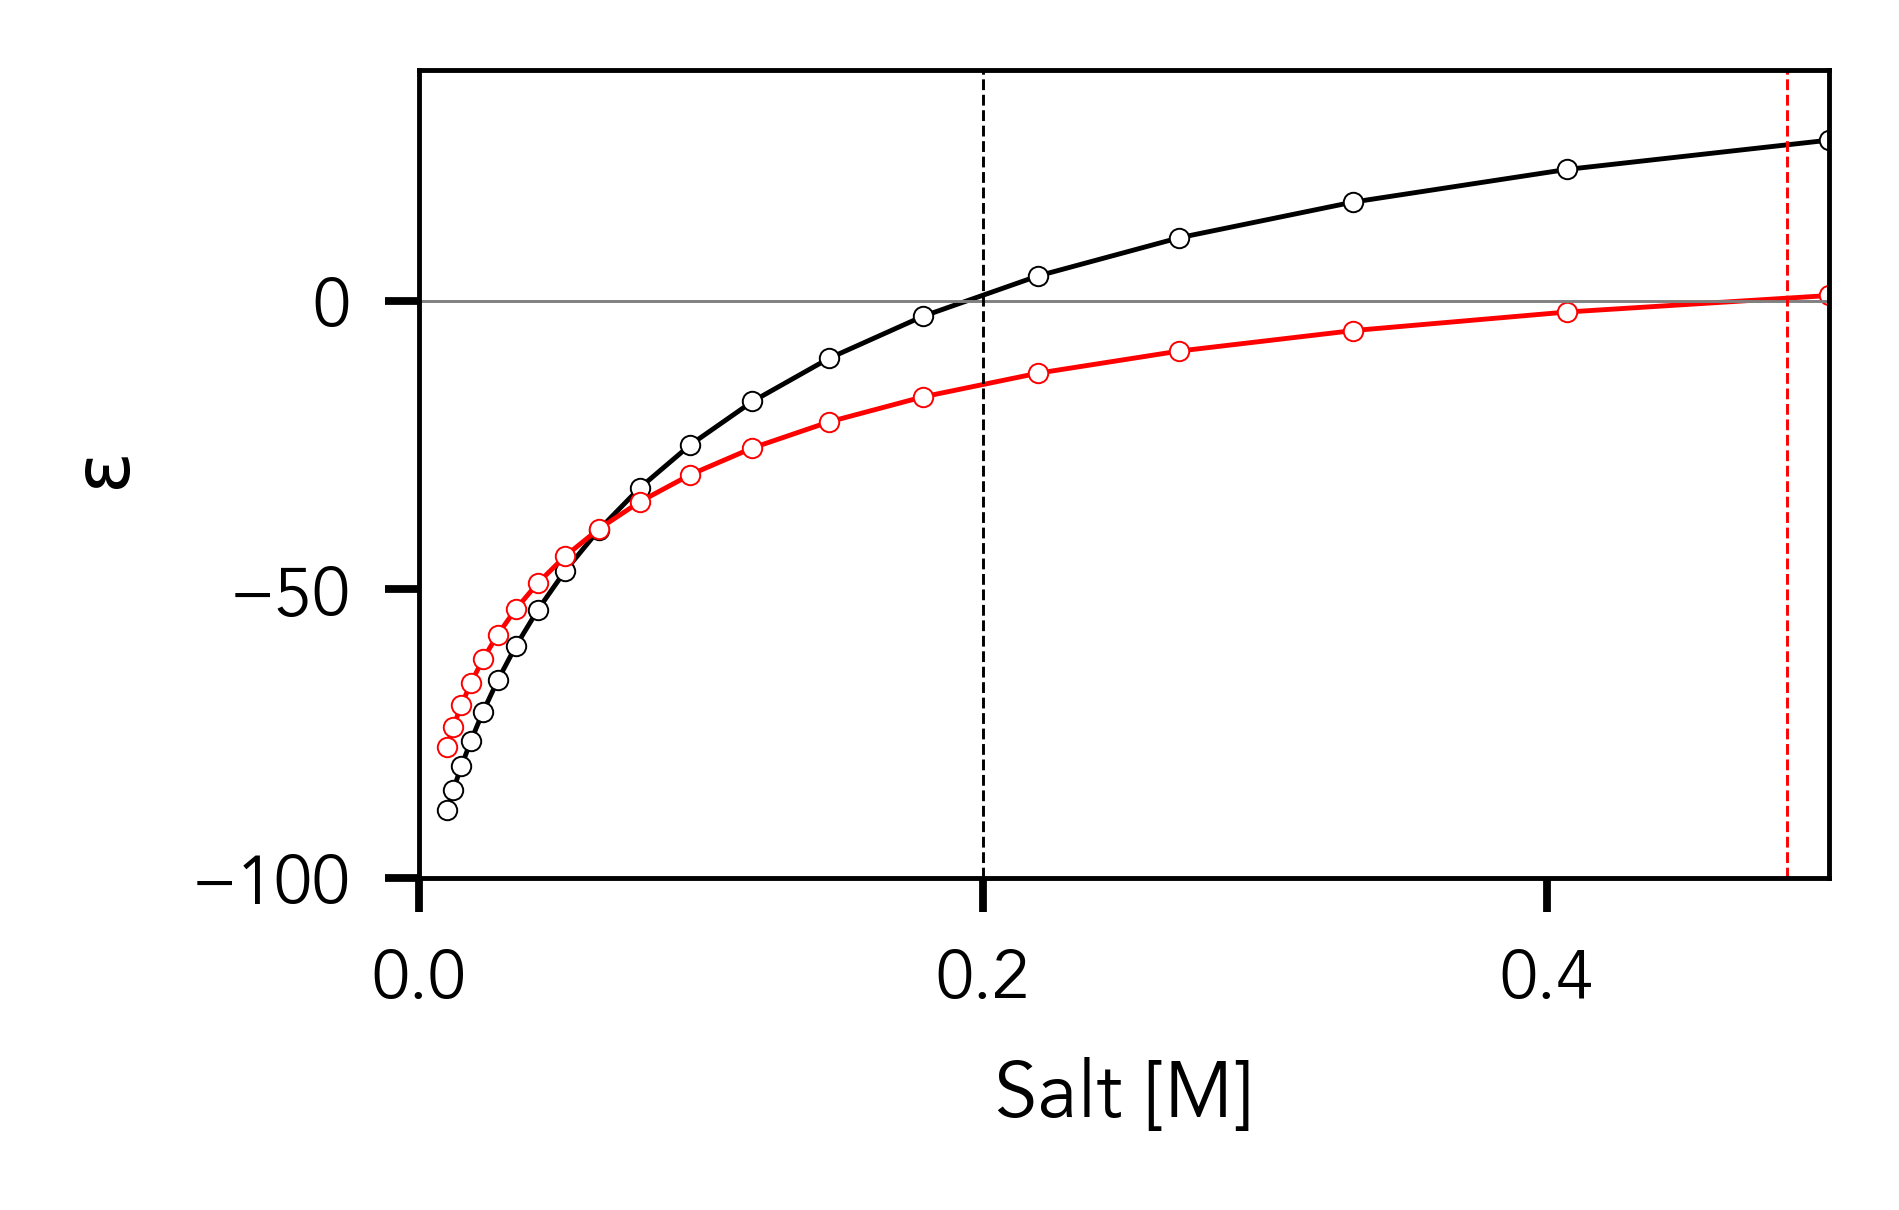

In [27]:
figure(None, (2.6,1.5), dpi=350)
ax = plt.gca()

plt.plot(salt,cf_eps_salt, '-ok', ms=2,lw=0.5, mfc='w', mew=0.2)
plt.plot(salt,mf_eps_salt, '-or', ms=2,lw=0.5, mfc='w', mew=0.2)
plt.xticks(np.arange(0,1.2,0.2), fontsize=7)
ax.axhline(0, color='grey',lw=0.3, ls='-')

# do this manually because I'm too lazy to fit and extrat the intercept...
salt_0_mf = 0.485
salt_0_cf = 0.2

ax.axvline(salt_0_mf, color='r',lw=0.3, ls='--')
ax.axvline(salt_0_cf, color='k',lw=0.3, ls='--')
print(salt_0_mf)
print(salt_0_cf)
plt.xlabel('Salt [M]', fontsize=8)
plt.ylabel(r'$\rm \epsilon$', fontsize=8)

plt.yticks(fontsize=7)
plt.ylim([-100, 40])
plt.xlim([0,0.5])

plt.savefig('out_figures/h1_protA_salt.pdf')

